In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.duplicated().sum()

3

In [11]:
df["species"].value_counts().sum

<bound method Series.sum of species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64>

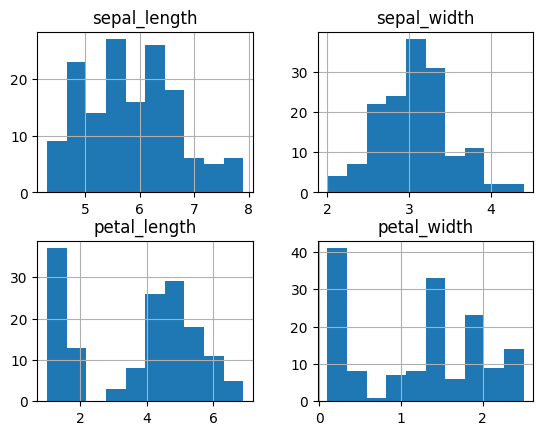

In [13]:
df.hist()
plt.show()

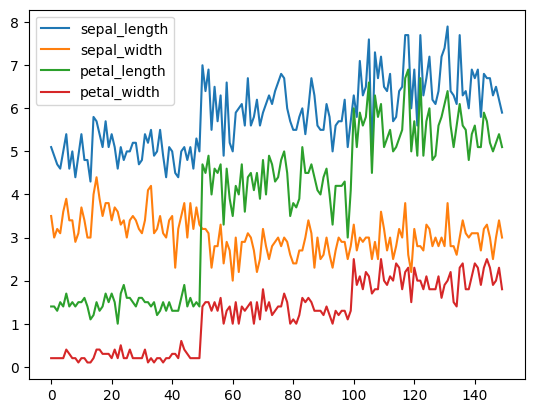

In [14]:
df.plot()
plt.show()

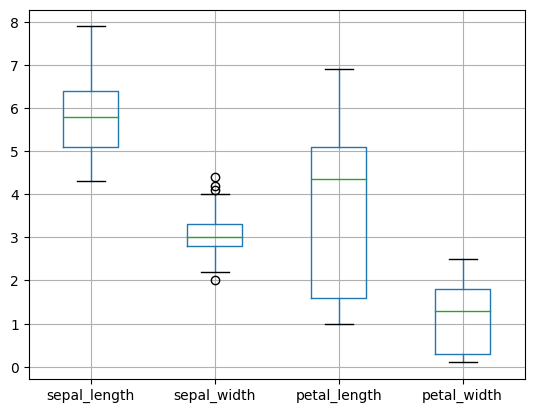

In [15]:
df.boxplot()
plt.show()

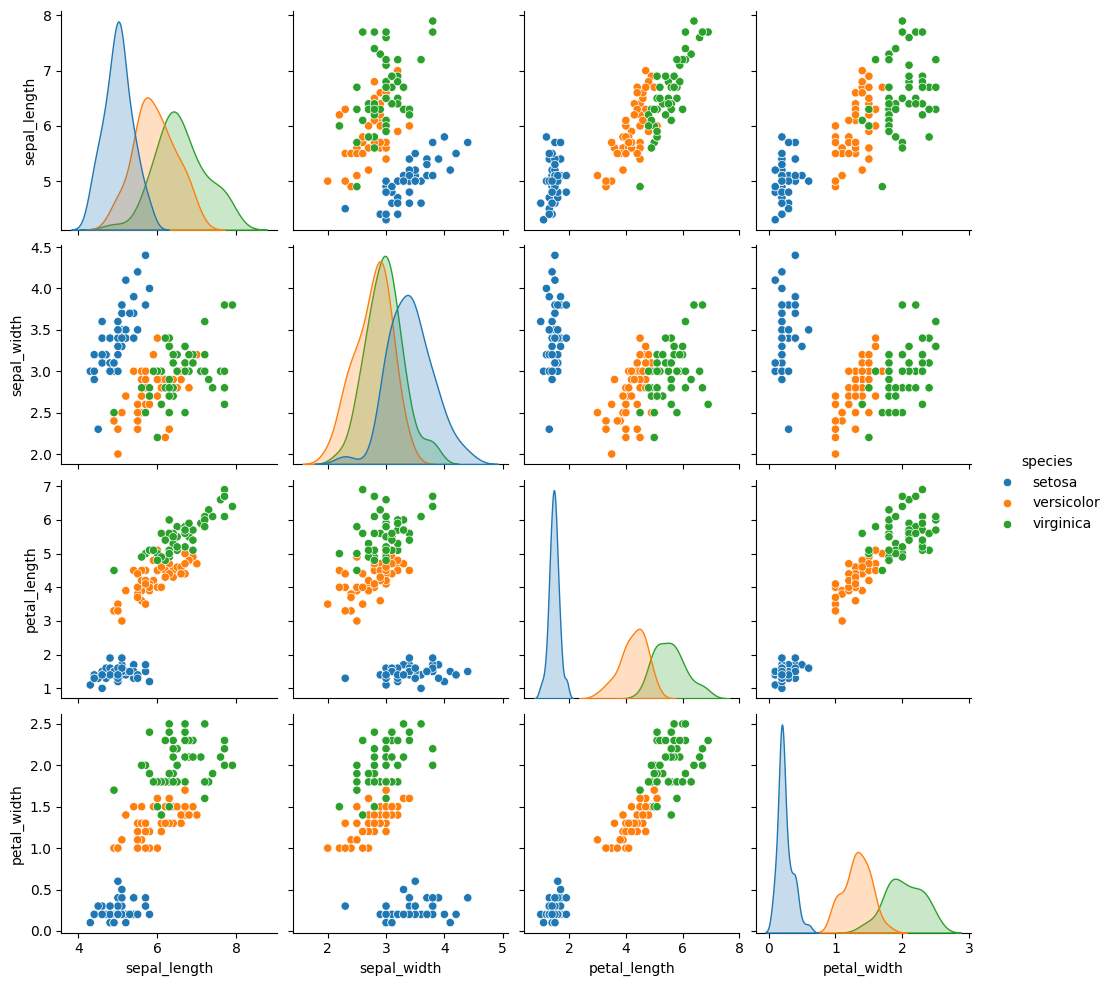

In [16]:
sns.pairplot(df, hue = "species")
plt.show()

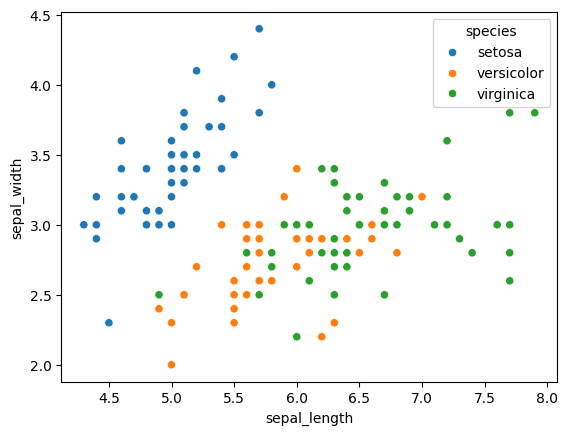

In [17]:
sns.scatterplot(x = "sepal_length", y = "sepal_width", data = df, hue  = "species")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Prepare data
X = df.drop(columns=['species'])
y = df['species']
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}
results = {}
# Cross-validation settings
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    print(f"Training {name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')     # Cross-validation scores (validation accuracy)
    model.fit(X_train, y_train
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_train_pred)    # Metrics for train set
    accuracy_test = accuracy_score(y_test, y_test_pred)    # Metrics for test set
    precision = precision_score(y_test, y_test_pred, average="weighted")
    recall = recall_score(y_test, y_test_pred, average="weighted")
    f1 = f1_score(y_test, y_test_pred, average="weighted")
    # ROC-AUC (only applicable for binary classification)
    roc_auc = None
    if len(np.unique(y)) == 2 and hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_proba)

    results[name] = {
        "Train Accuracy": accuracy_train,
        "Test Accuracy": accuracy_test,
        "Validation Accuracy (Cross-Validation Mean)": np.mean(cv_scores),
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc  }

    print(f"{name} Results:")
    print(f"Train Accuracy: {accuracy_train:.4f}, Test Accuracy: {accuracy_test:.4f}")
    print(f"Validation Accuracy (Cross-Validation Mean): {np.mean(cv_scores):.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("\n")

Training Logistic Regression...
Logistic Regression Results:
Train Accuracy: 0.9750, Test Accuracy: 0.9667
Validation Accuracy (Cross-Validation Mean): 0.9583
Precision: 0.9697, Recall: 0.9667, F1-Score: 0.9666


Training Random Forest...
Random Forest Results:
Train Accuracy: 1.0000, Test Accuracy: 0.9333
Validation Accuracy (Cross-Validation Mean): 0.9583
Precision: 0.9333, Recall: 0.9333, F1-Score: 0.9333


Training SVM...
SVM Results:
Train Accuracy: 0.9833, Test Accuracy: 0.9667
Validation Accuracy (Cross-Validation Mean): 0.9667
Precision: 0.9697, Recall: 0.9667, F1-Score: 0.9666




In [19]:
new_sample = pd.DataFrame({
    "sepal_length": [5.1],  
    "sepal_width": [3.5],  
    "petal_length": [1.4],  
    "petal_width": [0.2],  
})

# Make prediction
prediction = model.predict(new_sample)

# If using LabelEncoder, convert prediction back to original labels
#predicted_species = le.inverse_transform(prediction)

print(f"Predicted Species: {prediction[0]}")

Predicted Species: setosa
